### Step 1: Analyse Correlations

In [1]:
# Importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sb
import pandas as pd
from datetime import datetime
from functools import reduce

In [2]:
# Import cleaned datasets
bie_data = pd.read_csv("cleaned_bie.csv")
bitcoin_data = pd.read_csv("cleaned_bitcoin.csv")
co2_data = pd.read_csv("cleaned_co2.csv")
cpi_data = pd.read_csv("cleaned_cpi.csv")
lagged_cpi_data = pd.read_csv("cleaned_lagged_cpi.csv")
neer_data = pd.read_csv("cleaned_neer.csv")
oil_data = pd.read_csv("cleaned_oil.csv")
ppi_data = pd.read_csv("cleaned_ppi.csv")
sp_data = pd.read_csv("cleaned_sp.csv")
unemp_data = pd.read_csv("cleaned_unemp.csv")

# Store in a dictionary called as dataset_list
dataset_list = {
                'BIE': bie_data,
                'Bitcoin': bitcoin_data,
                'CO2': co2_data,
                'LaggedCPI': lagged_cpi_data,
                'NEER': neer_data,
                'Oil': oil_data,
                'PPI': ppi_data,
                'S&P500': sp_data,
                'Unemp': unemp_data
            }

# Inner join each dataset to the CPI dataset for comparison
df_list = {}
for k, v in dataset_list.items():
    df_list[k] = pd.merge(v, cpi_data, how='inner', on='Date')

In [3]:
# Calculate correlations between different variables to CPI
corr_list = {
            k:v[['Value_x', 'Value_y']].corr().iat[0,1] # [0,1] is the location on the correlation matrix that has the correlation of Value_x to Value_y
            for (k,v)
            in df_list.items()
        }

# Print correlations of each dataset to CPI
for k,v in corr_list.items():
    print(f'Correlation between {k} and CPI: \t{round(v,2)}')

Correlation between BIE and CPI: 	0.16
Correlation between Bitcoin and CPI: 	0.86
Correlation between CO2 and CPI: 	0.99
Correlation between LaggedCPI and CPI: 	1.0
Correlation between NEER and CPI: 	0.32
Correlation between Oil and CPI: 	0.72
Correlation between PPI and CPI: 	0.99
Correlation between S&P500 and CPI: 	0.87
Correlation between Unemp and CPI: 	0.2


### Step 2: Multi-Variate Pairplot & Heatmap

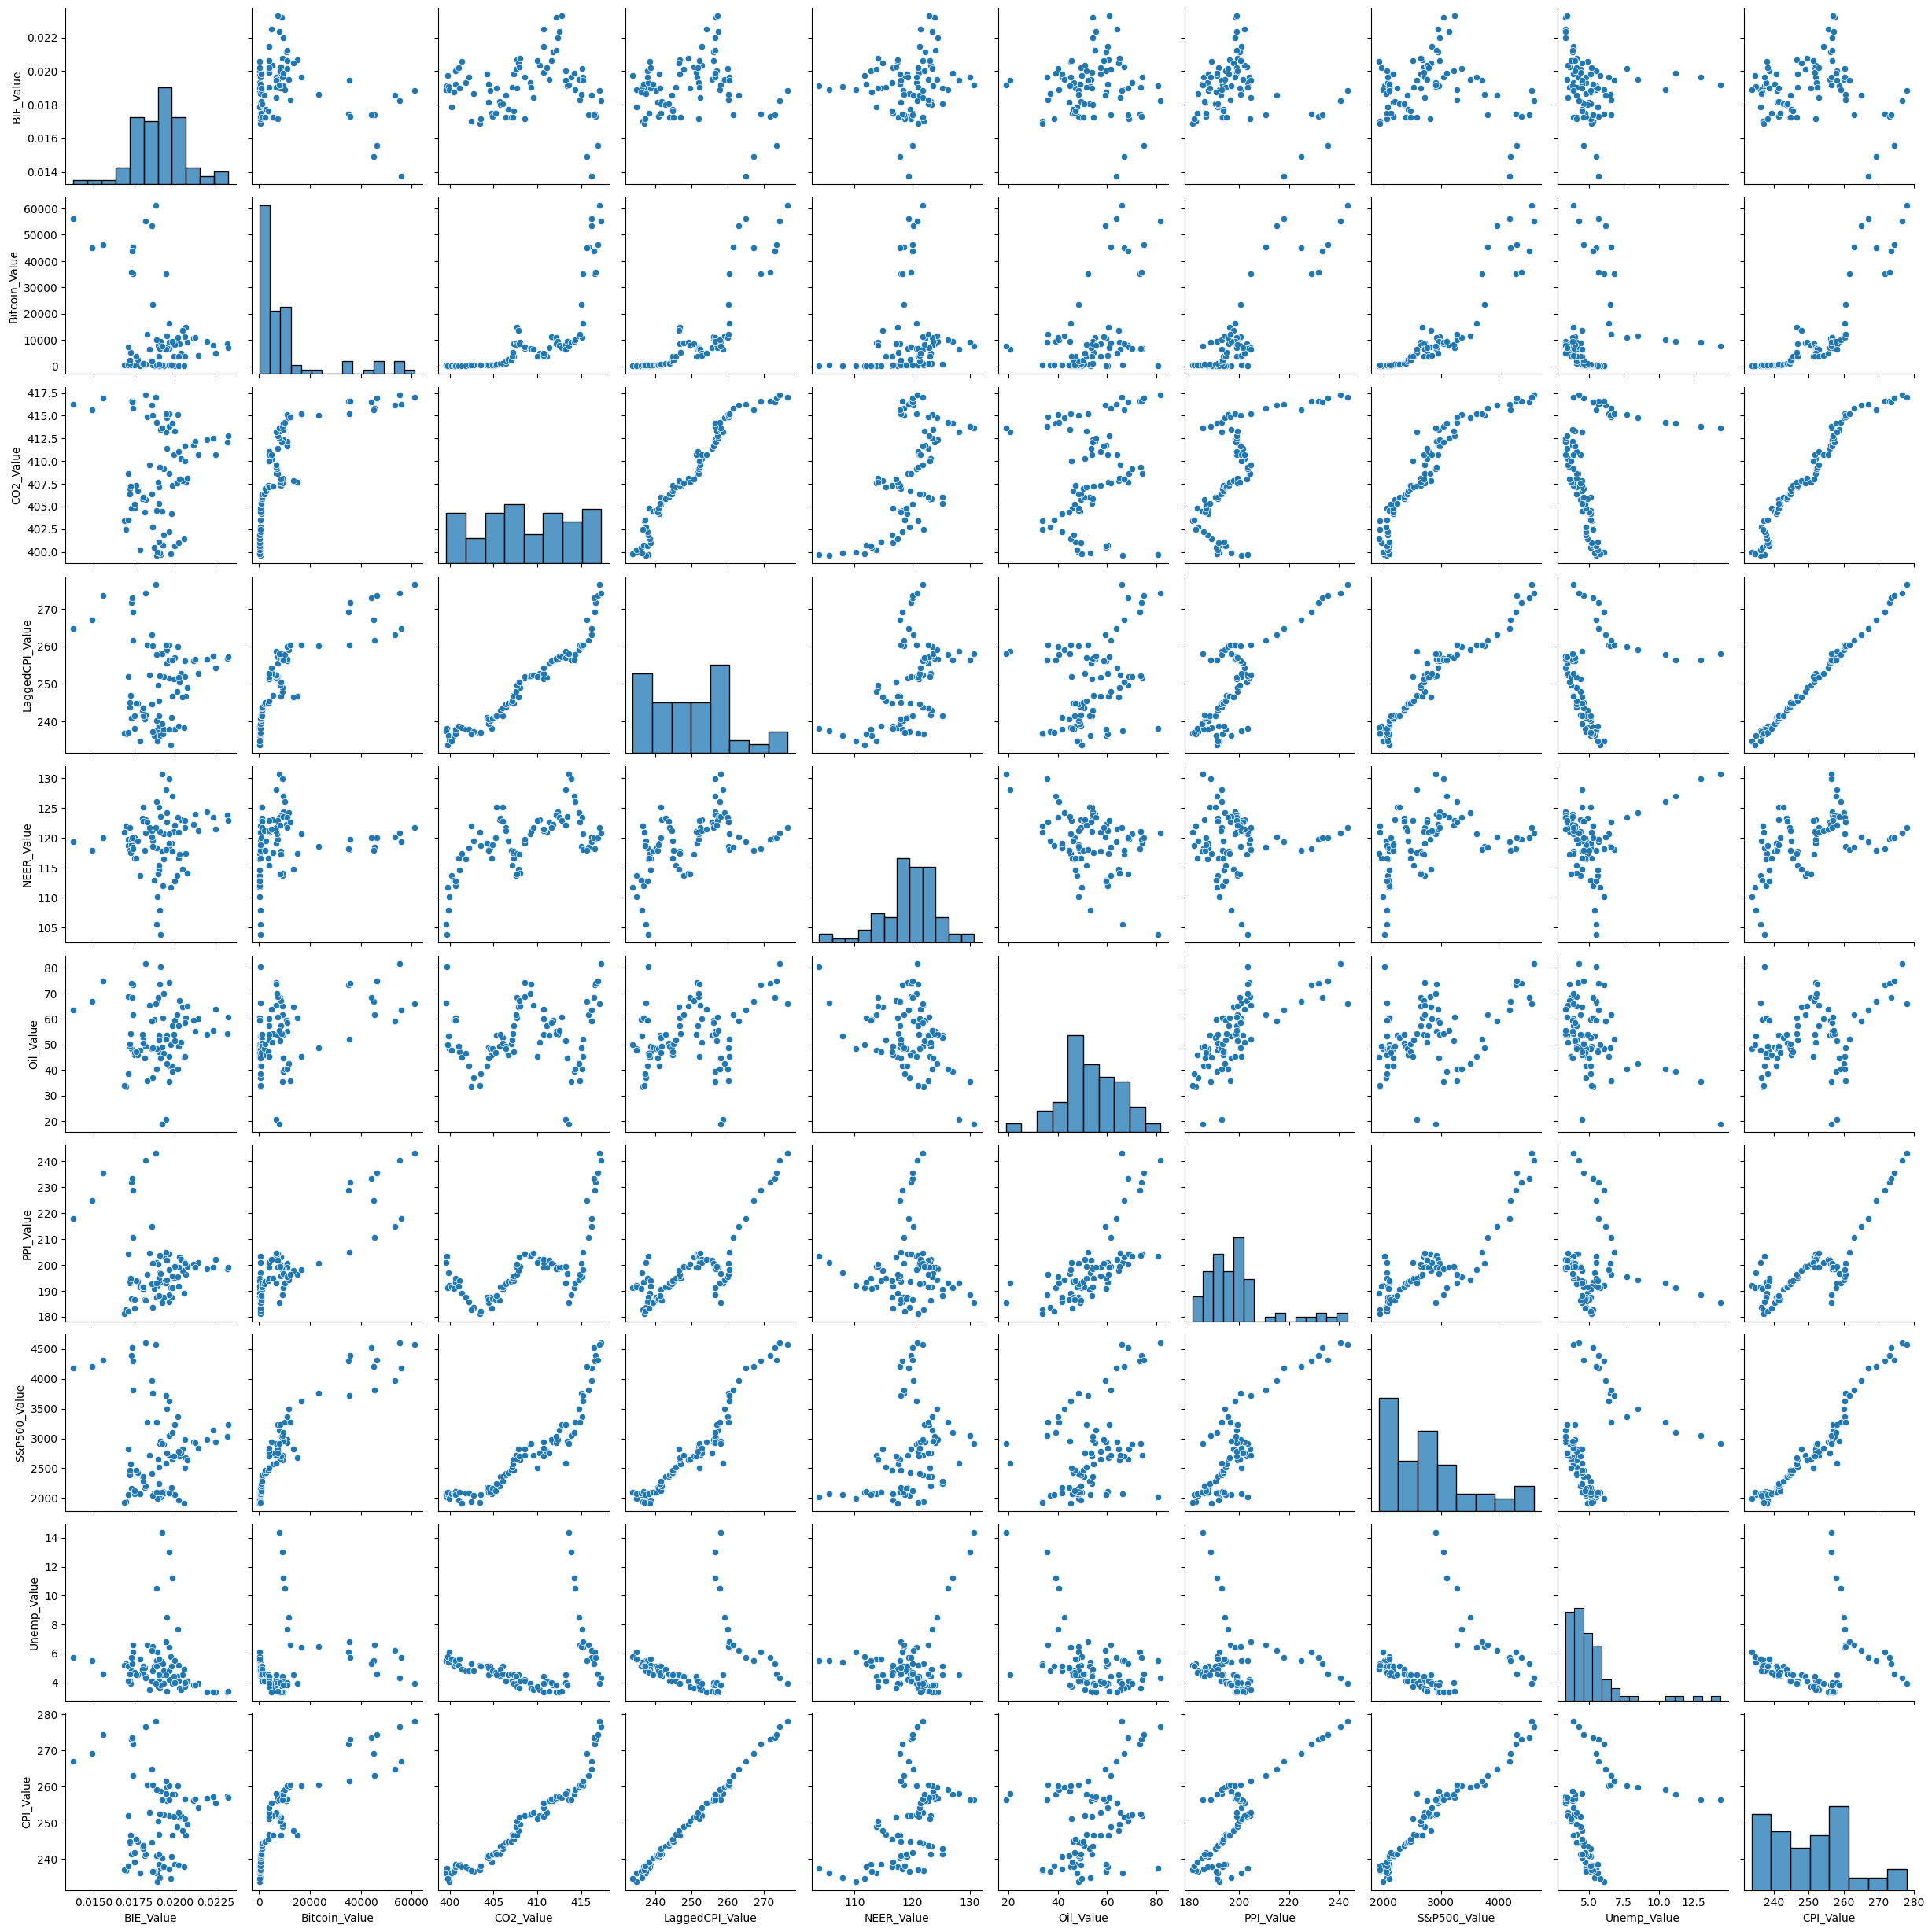

In [4]:
# Merge the values and plot a pairplot
dataset_list_values = {k:v[['Date', 'Value']].rename(columns={'Value': f"{k}_Value"}) for (k,v) in dataset_list.items()}
dataset_list_values['CPI'] = cpi_data[['Date', 'Value']].rename(columns={'Value': 'CPI_Value'})

# Merge the DataFrames
merged_values = reduce(lambda left,right: pd.merge(left,right,on='Date', how='inner'), dataset_list_values.values())

# Plot the data
sb.pairplot(data = merged_values)

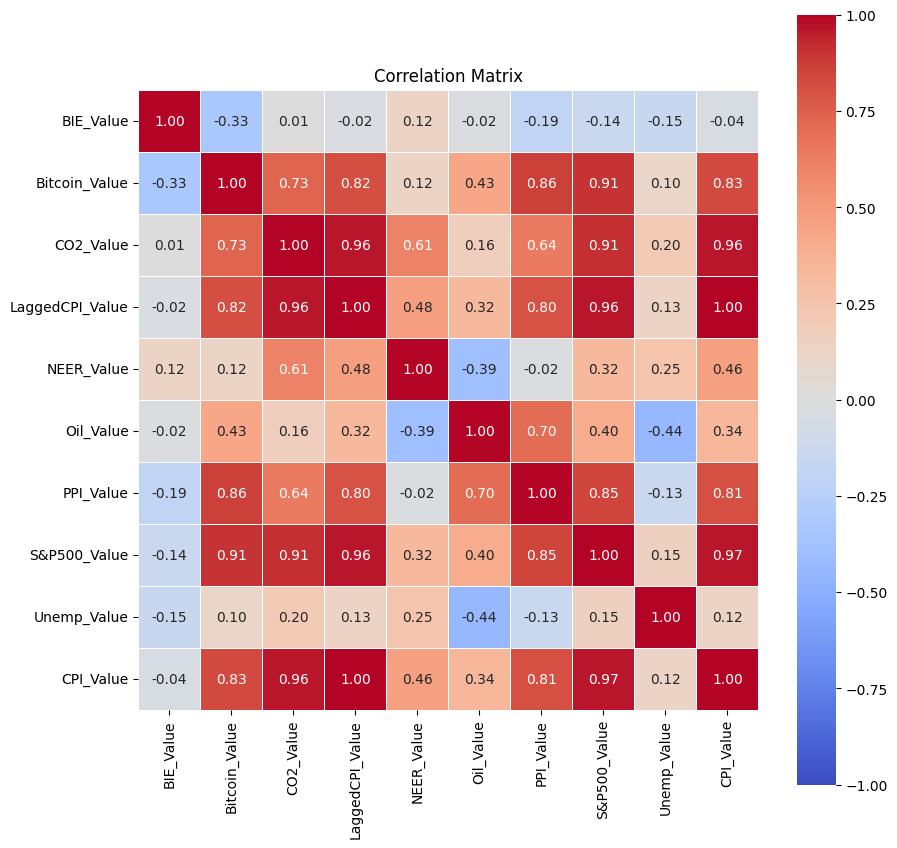

In [5]:
# Plot a correlation matrix heatmap
f = plt.figure(figsize=(10, 10))
sb.heatmap(merged_values.drop('Date', axis=1).corr(), 
           vmin=-1, vmax=1, 
           annot=True, fmt=".2f", 
           cmap="coolwarm",  # Use a diverging colormap
           square=True,  # Ensure the heatmap is square
           linewidths=0.5)  # Add some space between cells
plt.title("Correlation Matrix")  # Add a title
plt.show()

### Step 3: Analysing Monthly Percentage Changes
#### Step 3.1: Analysing Correlations between the Monthly Percentage Changes

In [6]:
# Calculate correlations of monthly percentage changes between different variables to CPI
monthly_change_corr_list = {
            k:v[['ChangePercentMonth_x', 'ChangePercentMonth_y']].corr().iat[0,1]
            for (k,v)
            in df_list.items()
        }

# Print correlations of the monthly percentage changes of each dataset to CPI
for k,v in monthly_change_corr_list.items():
    print(f'Correlation between {k} and CPI: \t{round(v,2)}')

Correlation between BIE and CPI: 	0.05
Correlation between Bitcoin and CPI: 	-0.02
Correlation between CO2 and CPI: 	0.01
Correlation between LaggedCPI and CPI: 	0.47
Correlation between NEER and CPI: 	-0.25
Correlation between Oil and CPI: 	0.25
Correlation between PPI and CPI: 	0.66
Correlation between S&P500 and CPI: 	-0.08
Correlation between Unemp and CPI: 	-0.09


#### Step 3.2: Analysing Distributions between the Monthly Percentage Changes

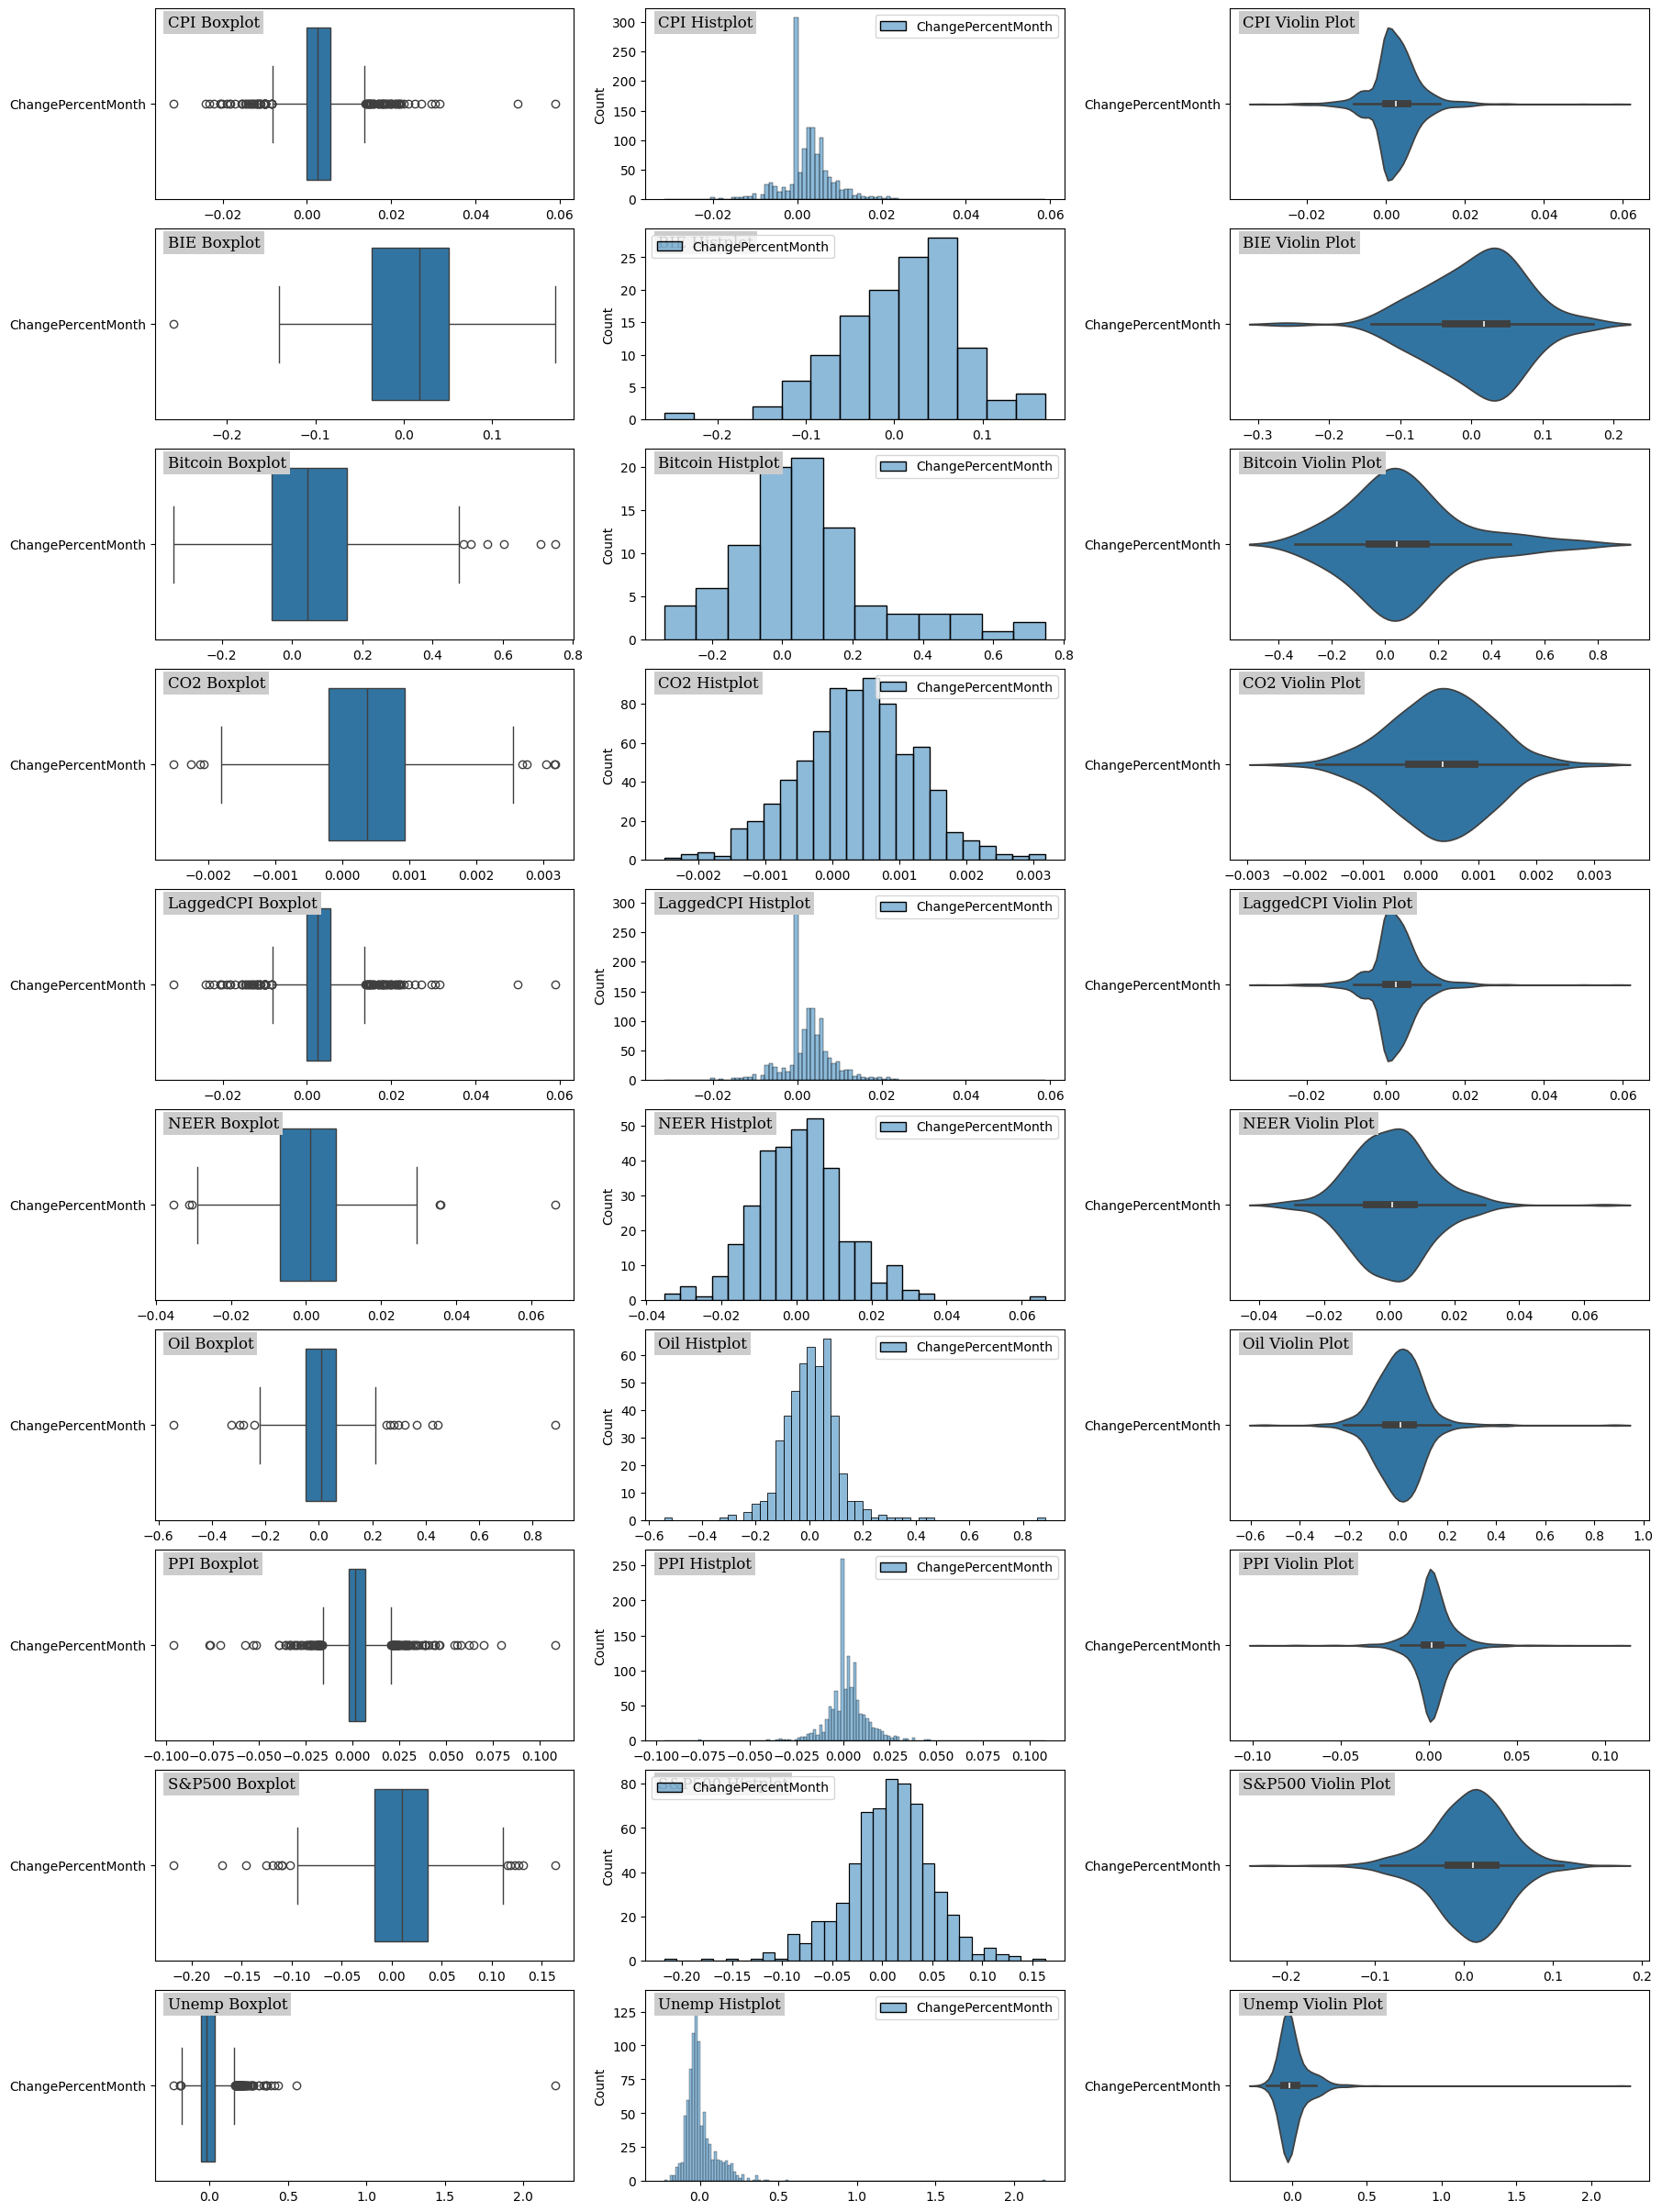

In [7]:
# Draw the distributions of all variables in a subplot mosaic
f, axes = plt.subplot_mosaic([
                                ['CPI Boxplot', 'CPI Histplot', 'CPI Violin Plot'],
                                ['BIE Boxplot', 'BIE Histplot', 'BIE Violin Plot'],
                                ['Bitcoin Boxplot', 'Bitcoin Histplot', 'Bitcoin Violin Plot'],
                                ['CO2 Boxplot', 'CO2 Histplot', 'CO2 Violin Plot'],
                                ['LaggedCPI Boxplot', 'LaggedCPI Histplot', 'LaggedCPI Violin Plot'],
                                ['NEER Boxplot', 'NEER Histplot', 'NEER Violin Plot'],
                                ['Oil Boxplot', 'Oil Histplot', 'Oil Violin Plot'],
                                ['PPI Boxplot', 'PPI Histplot', 'PPI Violin Plot'],
                                ['S&P500 Boxplot', 'S&P500 Histplot', 'S&P500 Violin Plot'],
                                ['Unemp Boxplot', 'Unemp Histplot', 'Unemp Violin Plot']
                            ],
                            constrained_layout=True, figsize=(18,24))

# Label the subplots
for label, ax in axes.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, f.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.8', edgecolor='none', pad=3.0))

# Plot the boxplot, histplot, and violin plot for each of our datasets
sb.boxplot(data = cpi_data[['ChangePercentMonth']], orient = "h", ax = axes['CPI Boxplot'])
sb.histplot(data = cpi_data[['ChangePercentMonth']], ax = axes['CPI Histplot'])
sb.violinplot(data = cpi_data[['ChangePercentMonth']], orient = "h", ax = axes['CPI Violin Plot'])
for dataset in dataset_list:
    sb.boxplot(data = dataset_list[dataset][['ChangePercentMonth']], orient = "h", ax = axes[f'{dataset} Boxplot'])
    sb.histplot(data = dataset_list[dataset][['ChangePercentMonth']], ax = axes[f'{dataset} Histplot'])
    sb.violinplot(data = dataset_list[dataset][['ChangePercentMonth']], orient = "h", ax = axes[f'{dataset} Violin Plot'])
plt.show()

### Step 4: Analysing Yearly Percentage Changes
#### Step 4.1: Analysing Correlations between the Yearly Percentage Changes

In [8]:
# Calculate correlations of monthly percentage changes between different variables to CPI
yearly_change_corr_list = {
            k:v[['ChangePercentYear_x', 'ChangePercentYear_y']].corr().iat[0,1]
            for (k,v)
            in df_list.items()
        }

# Print correlations of the monthly percentage changes of each dataset to CPI
for k,v in yearly_change_corr_list.items():
    print(f'Correlation between {k} and CPI: \t{round(v,2)}')

Correlation between BIE and CPI: 	0.15
Correlation between Bitcoin and CPI: 	0.08
Correlation between CO2 and CPI: 	-0.08
Correlation between LaggedCPI and CPI: 	0.99
Correlation between NEER and CPI: 	-0.42
Correlation between Oil and CPI: 	0.5
Correlation between PPI and CPI: 	0.8
Correlation between S&P500 and CPI: 	-0.14
Correlation between Unemp and CPI: 	-0.06



#### Step 4.2: Analysing Distributions between the Yearly Percentage Changes

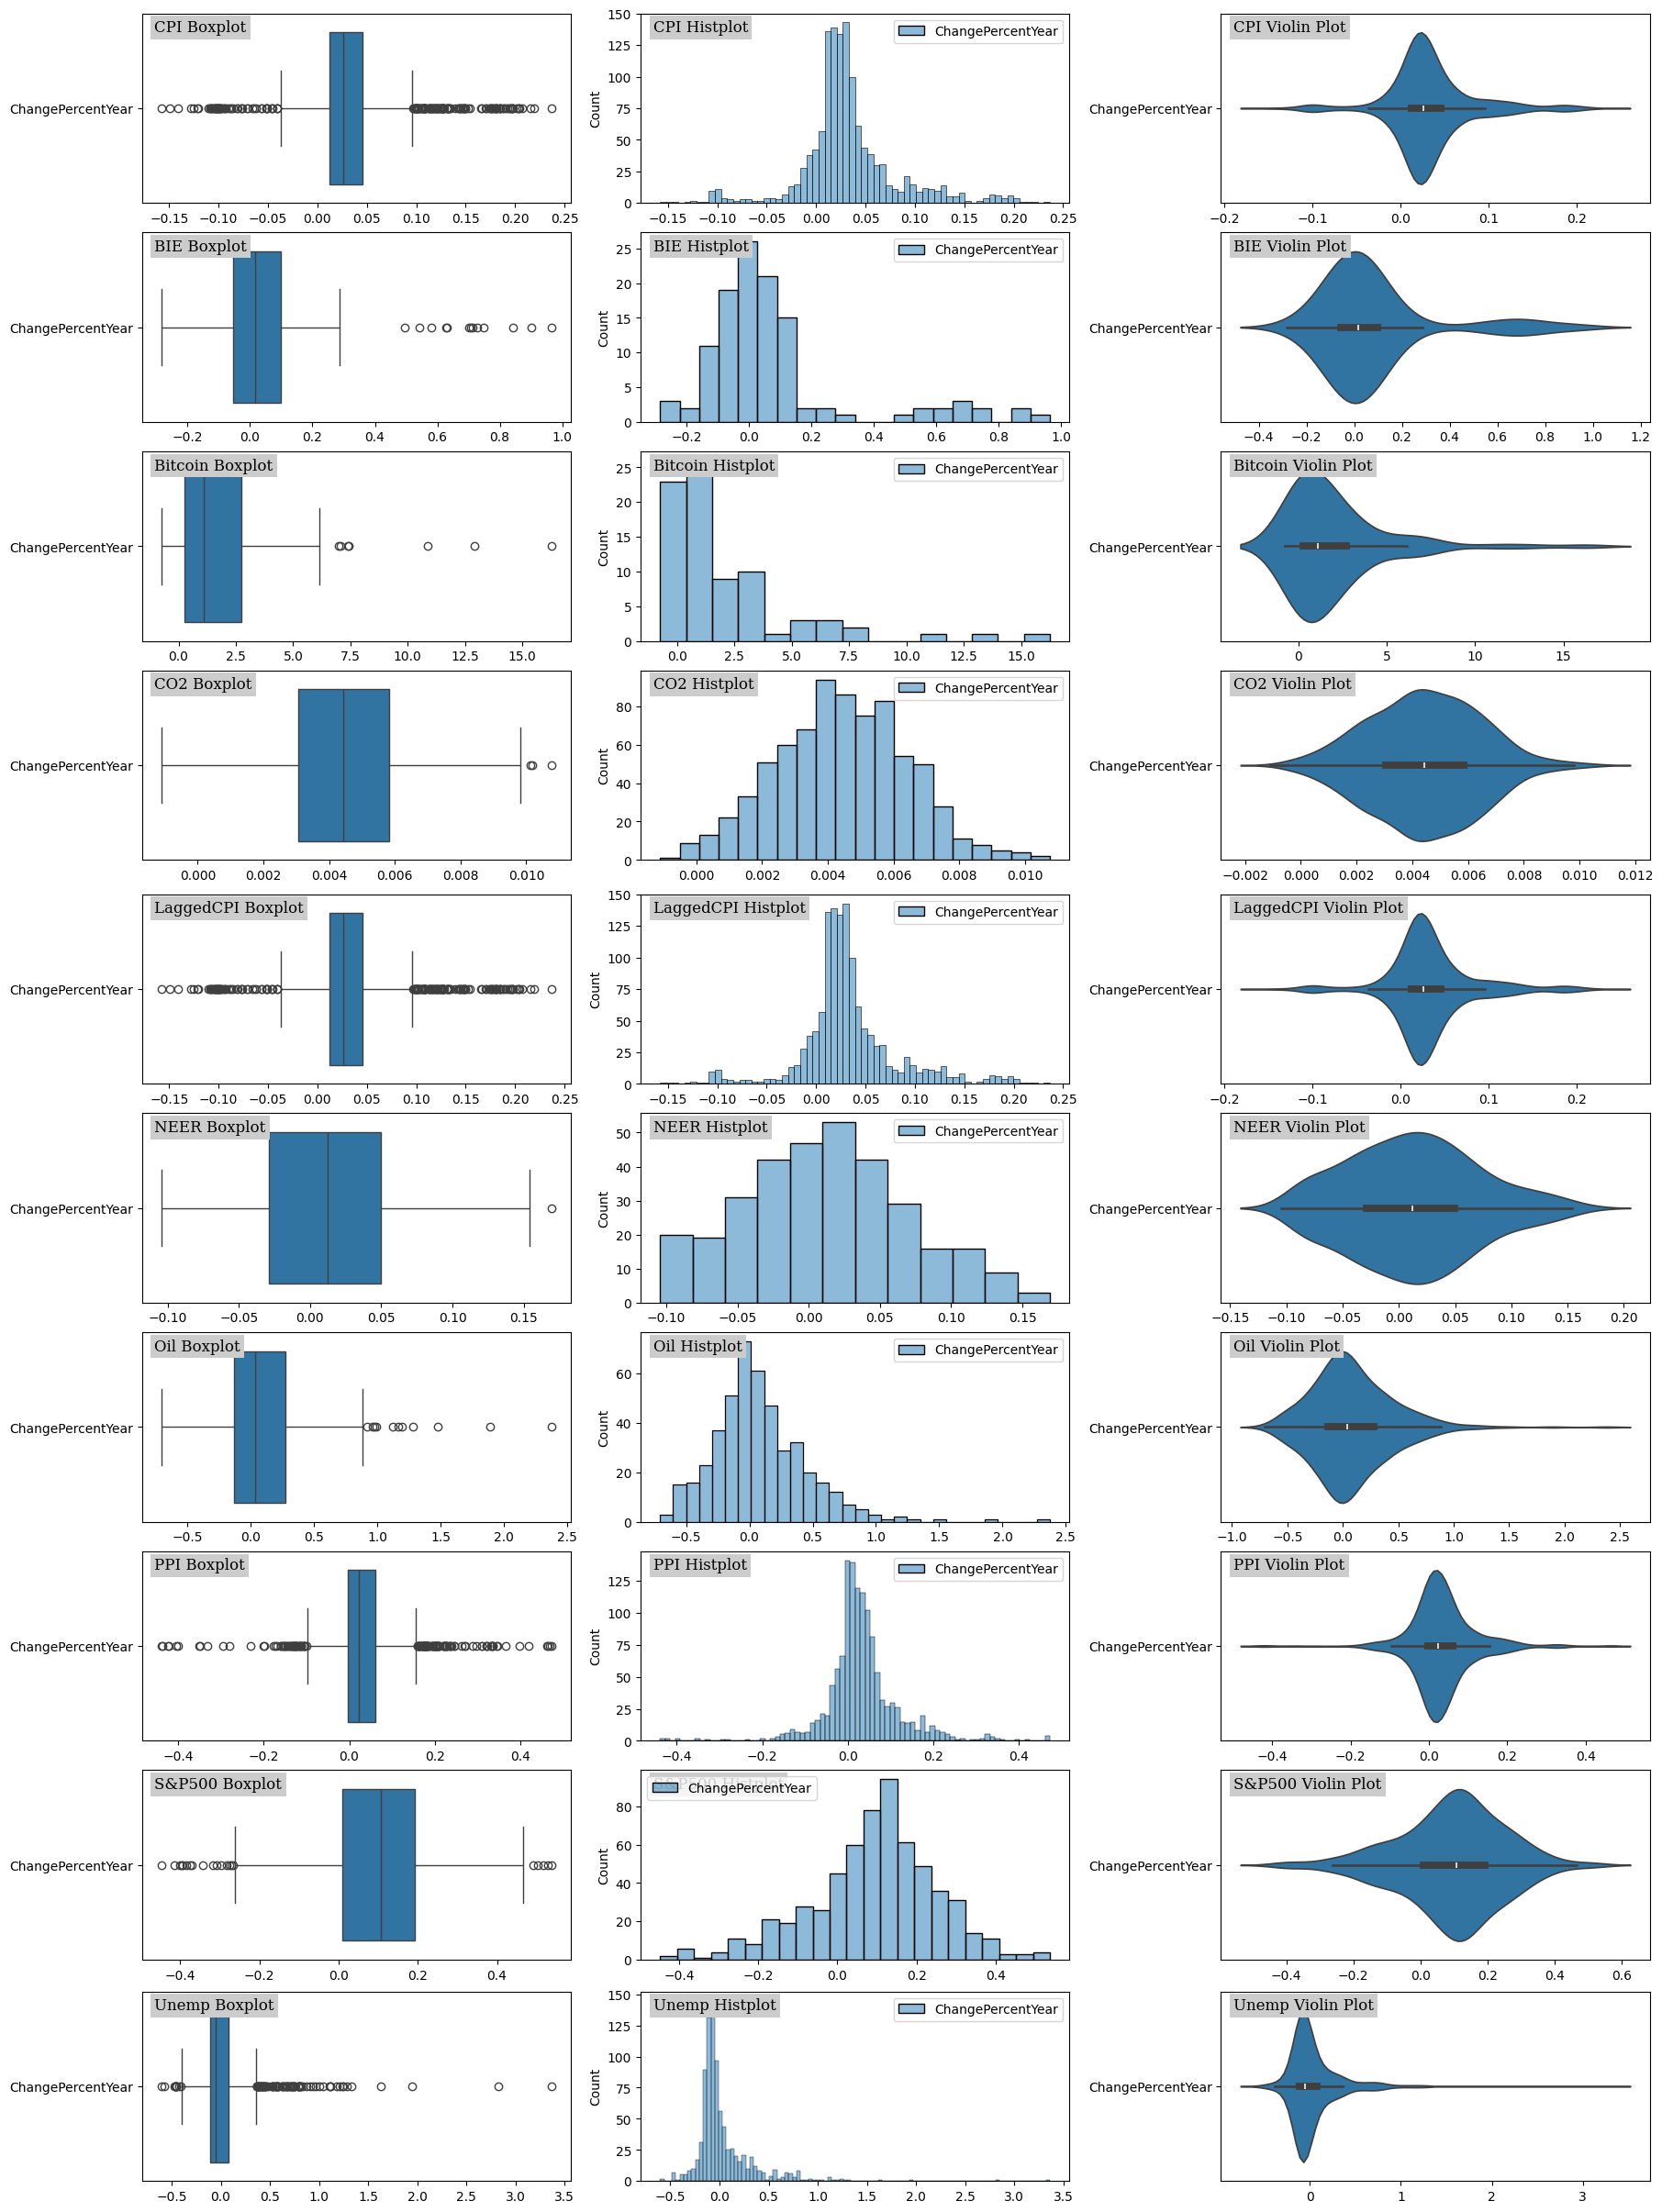

In [9]:
# Draw the distributions of all variables in a subplot mosaic
f, axes = plt.subplot_mosaic([
                                ['CPI Boxplot', 'CPI Histplot', 'CPI Violin Plot'],
                                ['BIE Boxplot', 'BIE Histplot', 'BIE Violin Plot'],
                                ['Bitcoin Boxplot', 'Bitcoin Histplot', 'Bitcoin Violin Plot'],
                                ['CO2 Boxplot', 'CO2 Histplot', 'CO2 Violin Plot'],
                                ['LaggedCPI Boxplot', 'LaggedCPI Histplot', 'LaggedCPI Violin Plot'],
                                ['NEER Boxplot', 'NEER Histplot', 'NEER Violin Plot'],
                                ['Oil Boxplot', 'Oil Histplot', 'Oil Violin Plot'],
                                ['PPI Boxplot', 'PPI Histplot', 'PPI Violin Plot'],
                                ['S&P500 Boxplot', 'S&P500 Histplot', 'S&P500 Violin Plot'],
                                ['Unemp Boxplot', 'Unemp Histplot', 'Unemp Violin Plot']
                            ],
                            constrained_layout=True, figsize=(18,24))

# Label the subplots
for label, ax in axes.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, f.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.8', edgecolor='none', pad=3.0))

# Plot the boxplot, histplot, and violin plot for each of our datasets
sb.boxplot(data = cpi_data[['ChangePercentYear']], orient = "h", ax = axes['CPI Boxplot'])
sb.histplot(data = cpi_data[['ChangePercentYear']], ax = axes['CPI Histplot'])
sb.violinplot(data = cpi_data[['ChangePercentYear']], orient = "h", ax = axes['CPI Violin Plot'])
for dataset in dataset_list:
    sb.boxplot(data = dataset_list[dataset][['ChangePercentYear']], orient = "h", ax = axes[f'{dataset} Boxplot'])
    sb.histplot(data = dataset_list[dataset][['ChangePercentYear']], ax = axes[f'{dataset} Histplot'])
    sb.violinplot(data = dataset_list[dataset][['ChangePercentYear']], orient = "h", ax = axes[f'{dataset} Violin Plot'])
plt.show()